## Student Performance Indicator

### 1. Import packages ans dataset

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import CSV data

In [2]:
df = pd.read_csv('data/stud.csv')

#### Check dataset import

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2. Global informations about dataset

#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

#### Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Dataset legend

***Explaination of the values in each column :***
* ***gender** : sex of students -> Male/female*
* ***race/ethnicity** : ethnicity of students -> Group A, B, C, D, E*
* ***parental level of education** : parents' final education -> bachelor's degree,some college,master's degree,associate's degree,high school*
* ***lunch** : having lunch before test -> standard or free/reduced*
* ***test preparation course** : complete or not complete before test*
* ***math score** : 0 to 100*
* ***reading score** : 0 to 100*
* ***writing score** : 0 to 100*

### 3. Check data

##### Check data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Check number of unique values of each column

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### Check missing values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

*There is no missing values in this dataset*

##### Check duplicates

In [9]:
df.duplicated().sum()

0

*There is no duplicated values in this dataset*

##### Check statistics of the data

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


*Some insights :*
* *From above description of numerical data, all means are very close to each other - between 66 and 68.05*
* *All standard deviations are also close - between 14.6 and 15.19*
* *While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17*

### 4. Preparation of data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


#### Define numeric and categorical columns

In [13]:
# watching index of columns df.columns
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [14]:
# iterate on the index object to watch types of each columns
for feature in df.columns:
    print(df[feature].dtype)

object
object
object
object
object
int64
int64
int64


In [15]:
# automate selection of numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
# print types of columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
# Check types are okay
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### Adding columns for "Total Score" and "Average"

In [18]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 5. Exploring Data

#### Check the repartition of data by category

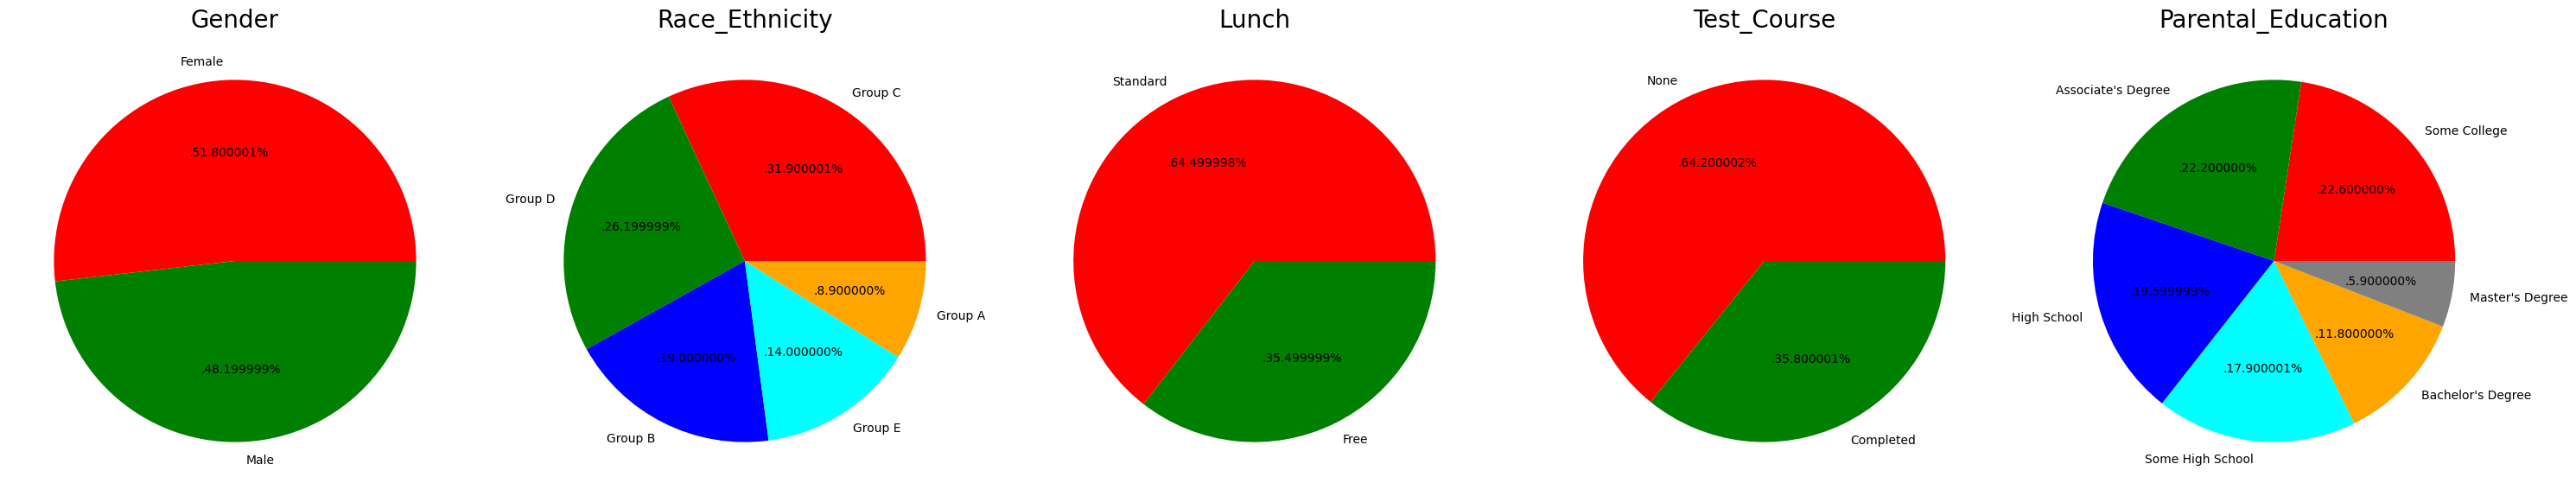

In [19]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Count of full success tests people (100 / 100)

In [20]:
math_full = df[df['math_score'] == 100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')

Number of students with full marks in Maths: 7


In [21]:
df[df['math_score'] == 100]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


In [22]:
math_full = df[df['math_score'] == 100]['math_score'].count()
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


#### Count of fail tests people (less than 20 / 100)

In [23]:
reading_less_20 = df[df['reading_score'] <= 20]['reading_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['writing_score'].count()
math_less_20 = df[df['math_score'] <= 20]['math_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


*Insights :*
* *From above values we get students have performed the worst in Maths*
* *Best performance is in reading section*

#### Distribution of average score and total scores

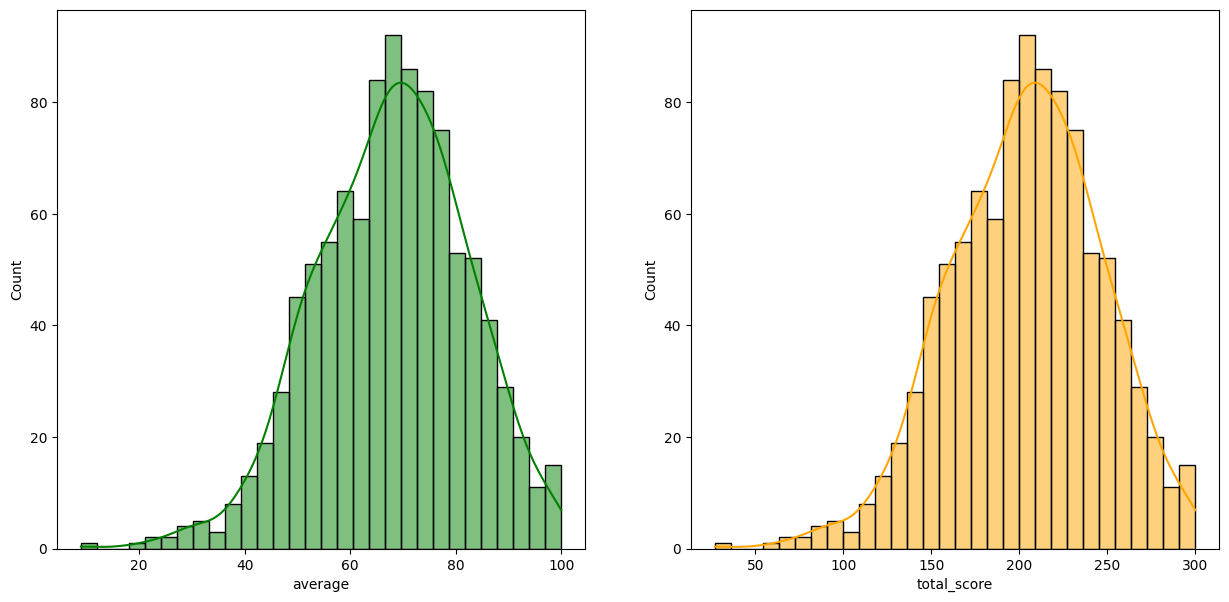

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde = True, color = 'green')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde = True, color = 'orange')
plt.show()

#### Impact of the gender on average score and total scores

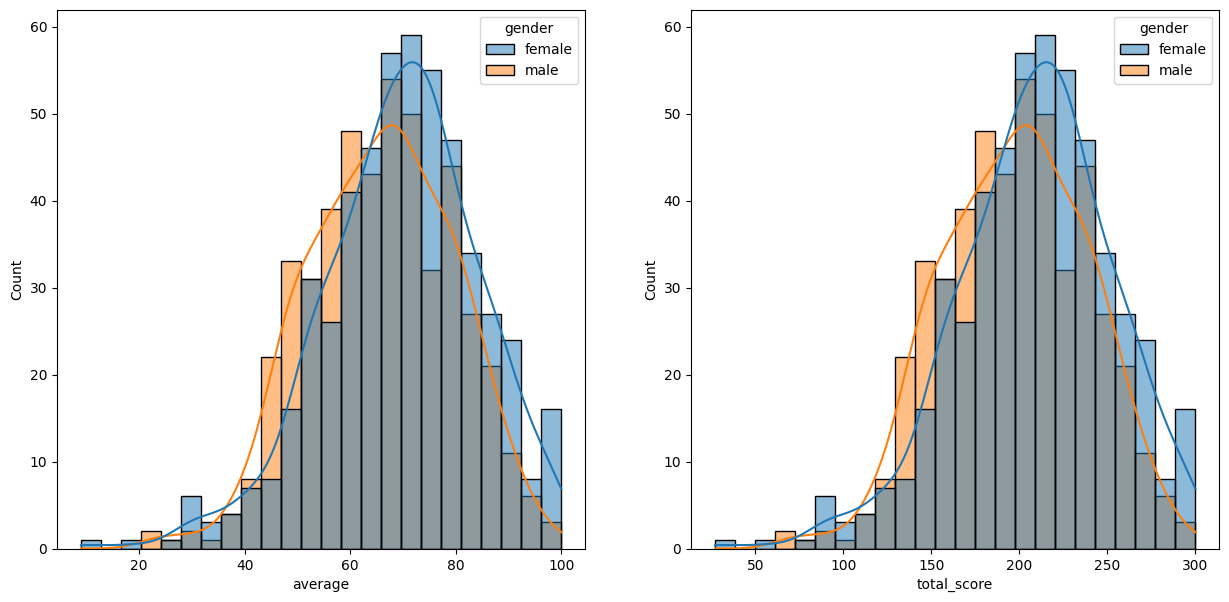

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

*Female students tend to perform well then male students.*

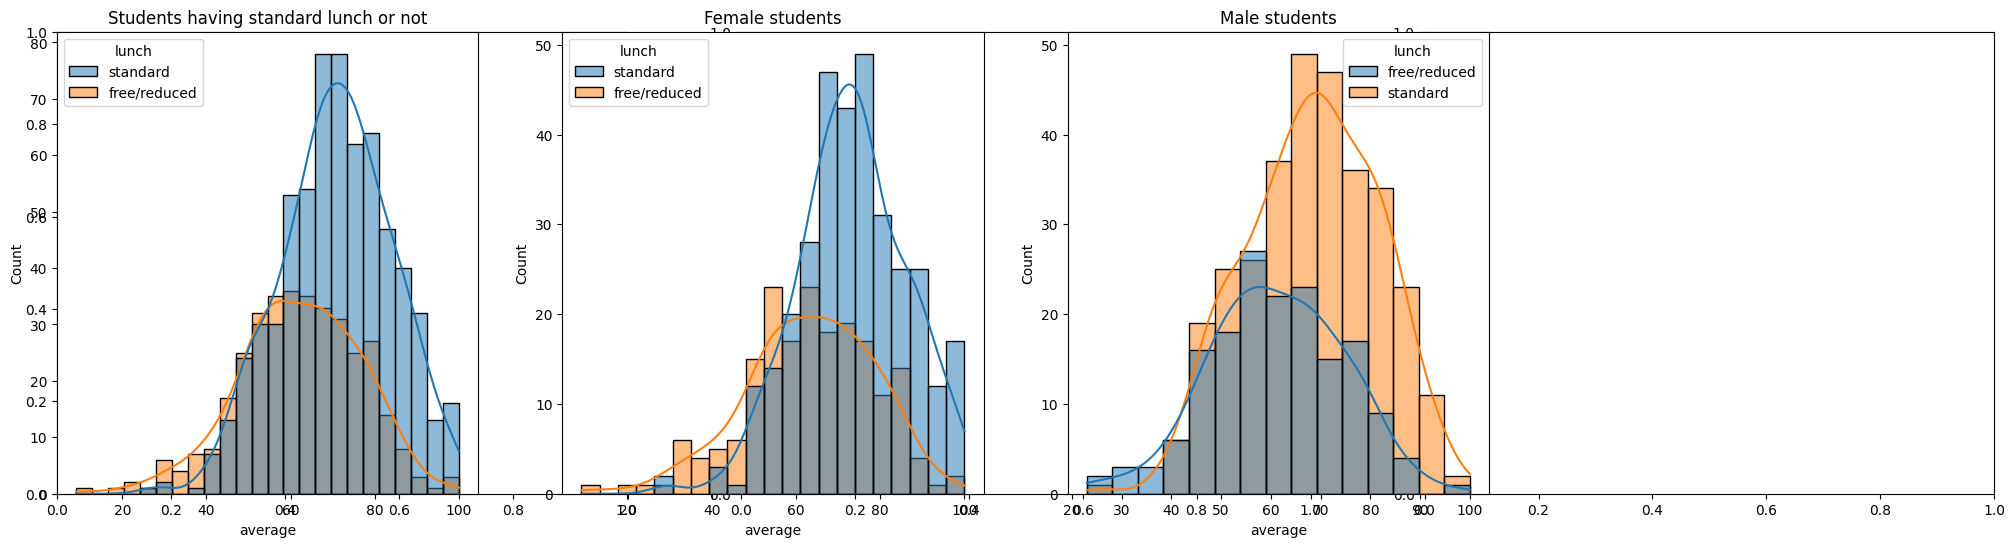

In [26]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
plt.title("Students having standard lunch or not")
sns.histplot(data=df,x='average', kde=True, hue= 'lunch')
plt.subplot(142)
plt.title("Female students")
sns.histplot(data=df[df.gender=='female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
plt.title("Male students")
sns.histplot(data=df[df.gender=='male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

#### Impact of parents's level of education on average score and total scores

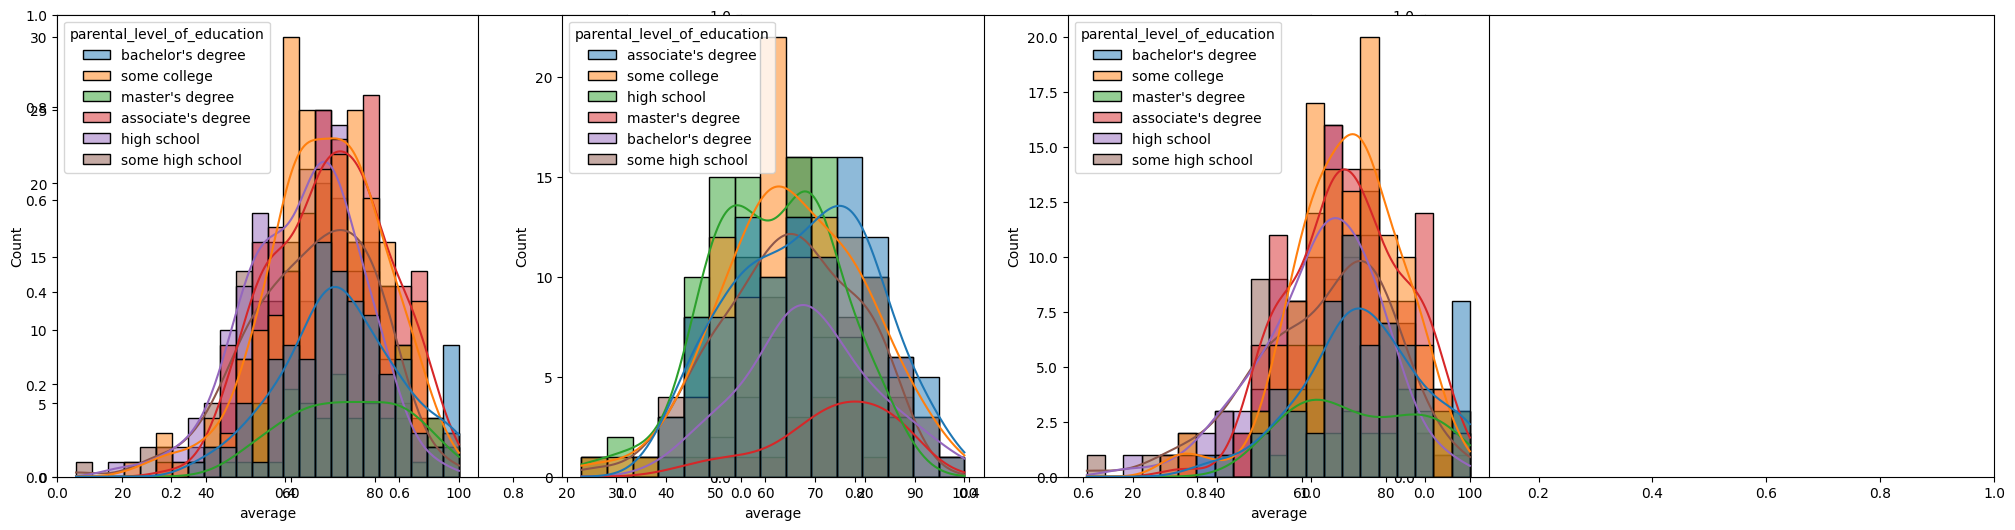

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

* *In general parent's education don't help student perform well in exam.*
* *2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam*
* *3rd plot we can see there is no effect of parent's education on female students.*

#### Impact of ethnicity on average score and total scores

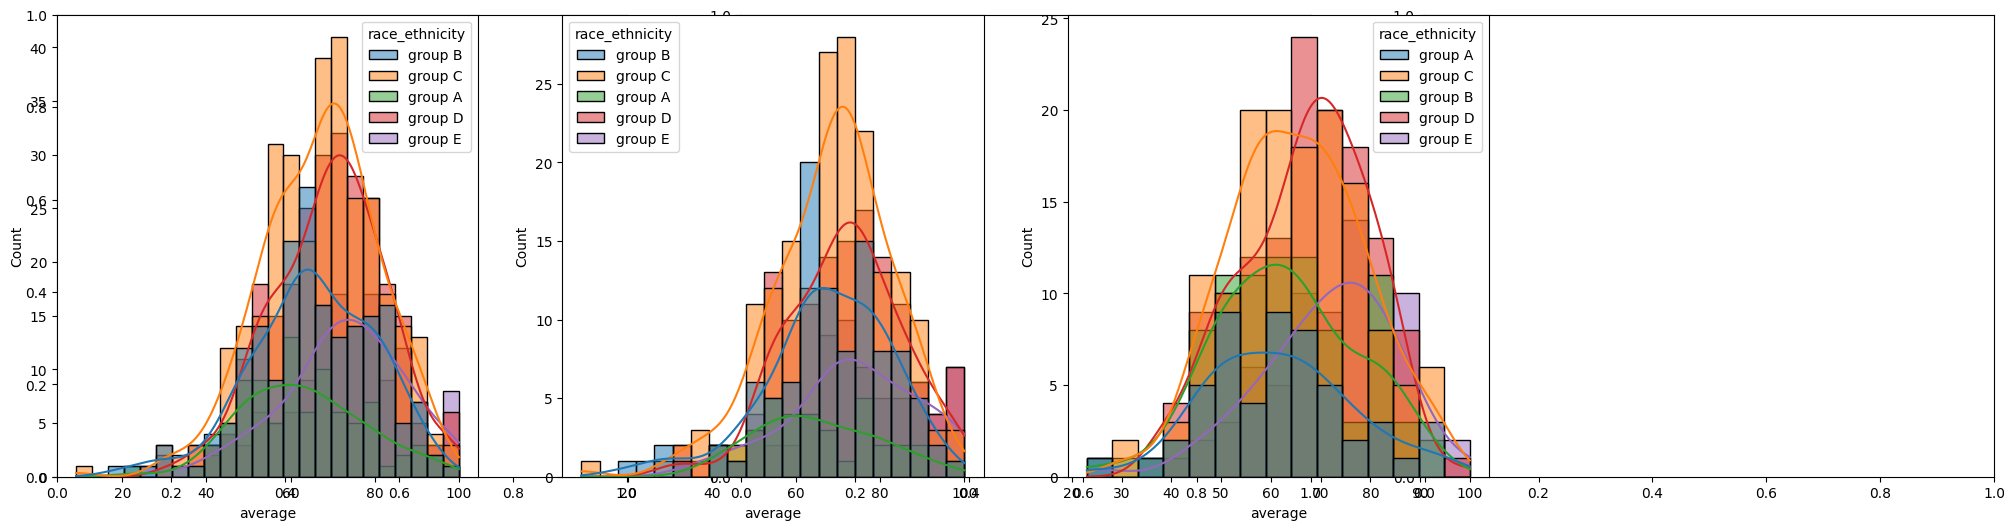

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

* *Students of group A and group B tends to perform poorly in exam.*
* *Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.*

#### Maximum score of students in all three subject

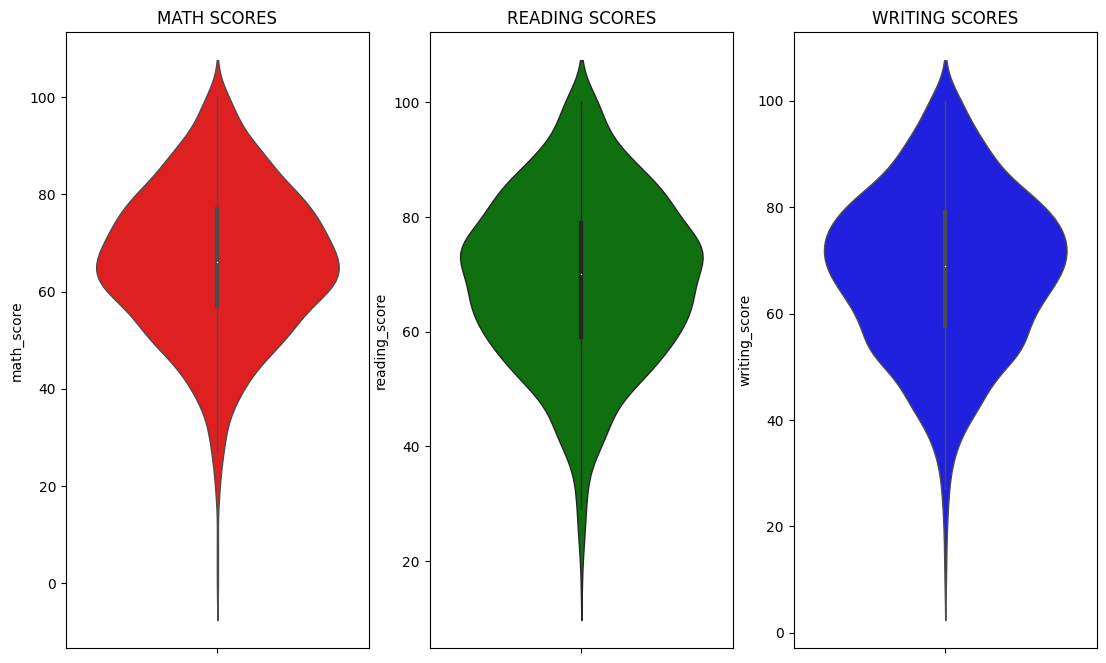

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=1)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=1)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=1)
plt.show()

* *Number of Male and Female students is almost equal*
* *Number students are greatest in Group C*
* *Number of students who have standard lunch are greater*
* *Number of students who have not enrolled in any test preparation course is greater*
* *Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"*

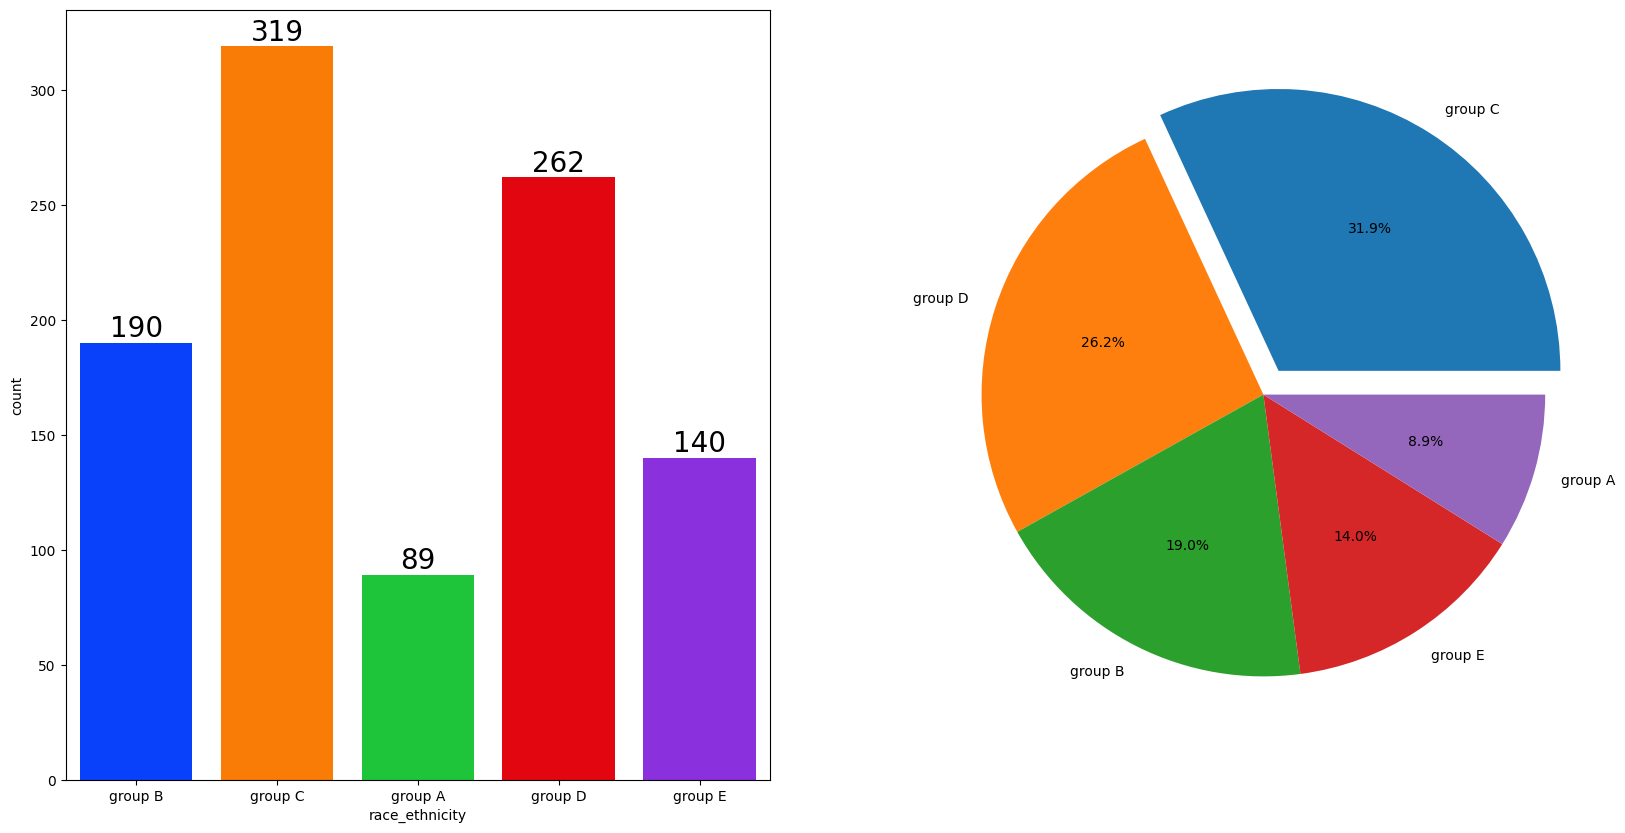

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=False)
plt.show()   

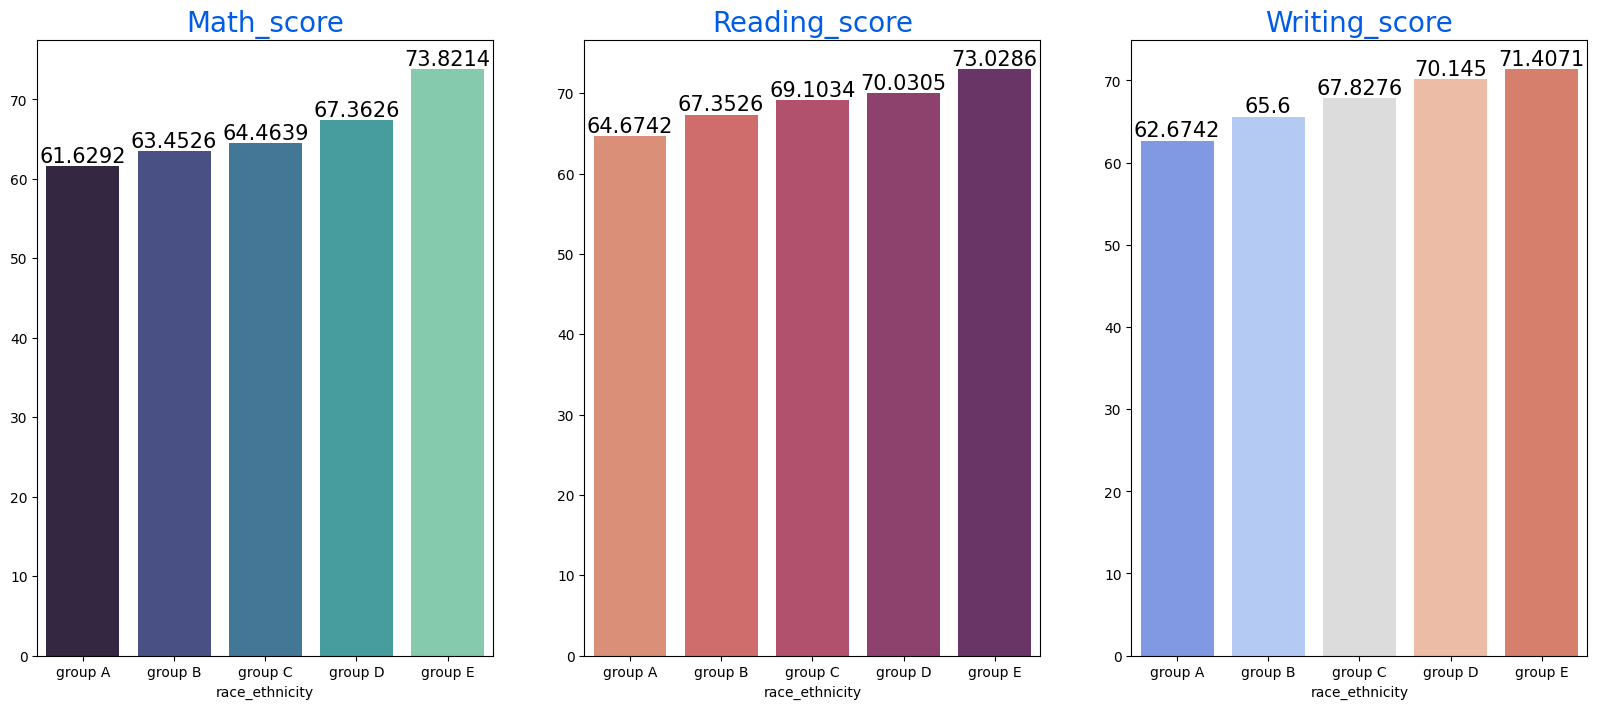

In [31]:
# dataset where results are by race_ethnicity
Group_data2=df.groupby('race_ethnicity')

# plot mean math score
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)
# plot scores on the bar
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# plot mean reading score
sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)
# plot scores on the bar
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

# plot mean writing score
sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)
# plot scores on the bar
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Conclusion

* *Student's Performance is related with lunch, race, parental level education*
* *Females lead in pass percentage and also are top-scorers*
* *Student's Performance is not much related with test preparation course*
* *Finishing preparation course is benefitial.*